## EDA

In [60]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud
import numpy as np

# Define your custom color palette
custom_palette = ["green", "orange", "darkviolet"]  # Again, darkviolet represents dark purple

# Set the palette as the default for all plots
sns.set_palette(custom_palette)

#Define your custom color palette
custom_colors = ["green", "orange", "darkviolet"]  # darkviolet is a shade of dark purple

# Set the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)


In [2]:
# Load the datasets
chefmozaccepts = pd.read_csv('../data/chefmozaccepts.csv')
chefmozcuisine = pd.read_csv('../data/chefmozcuisine.csv')
chefmozhours4 = pd.read_csv('../data/chefmozhours4.csv')
chefmozparking = pd.read_csv('../data/chefmozparking.csv')
geoplaces2 = pd.read_csv('../data/geoplaces2.csv', encoding='ISO-8859-1')  # Correctly loaded with ISO-8859-1 encoding
rating_final = pd.read_csv('../data/rating_final.csv')
usercuisine = pd.read_csv('../data/usercuisine.csv')
userpayment = pd.read_csv('../data/userpayment.csv')
userprofile = pd.read_csv('../data/userprofile.csv')

In [3]:
# Update the datasets list with all correctly loaded DataFrames
datasets = [chefmozaccepts, chefmozcuisine, chefmozhours4, chefmozparking, geoplaces2, rating_final, usercuisine, userpayment, userprofile]

# Display the first few rows of each dataset again
dataset_names = ['chefmozaccepts', 'chefmozcuisine', 'chefmozhours4', 'chefmozparking', 'geoplaces2', 'rating_final', 'usercuisine', 'userpayment', 'userprofile']

# Now, display the first few rows of each dataset
for name, dataset in zip(dataset_names, datasets):
    print(f"First few rows of {name}:")
    display(dataset.head())
    print("\n")

First few rows of chefmozaccepts:


,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards




First few rows of chefmozcuisine:


,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food




First few rows of chefmozhours4:


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;




First few rows of chefmozparking:


,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none




First few rows of geoplaces2:


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none




First few rows of rating_final:


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2




First few rows of usercuisine:


,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch




First few rows of userpayment:


,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards




First few rows of userprofile:


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [4]:
# Combine Restaurant-related Data
# First, aggregate categorical data for each placeID in chefmozaccepts, chefmozcuisine, and chefmozparking

# Aggregating 'Rpayment' from chefmozaccepts by placeID
payments_agg = chefmozaccepts.groupby('placeID')['Rpayment'].apply(list).reset_index()

# Aggregating 'Rcuisine' from chefmozcuisine by placeID
cuisine_agg = chefmozcuisine.groupby('placeID')['Rcuisine'].apply(list).reset_index()

# Aggregating 'parking_lot' from chefmozparking by placeID
parking_agg = chefmozparking.groupby('placeID')['parking_lot'].apply(list).reset_index()

# Now, merge these aggregated datasets with geoplaces2 on 'placeID'
restaurant= geoplaces2.merge(payments_agg, on='placeID', how='left')\
                          .merge(cuisine_agg, on='placeID', how='left')\
                          .merge(parking_agg, on='placeID', how='left')

# Display the first few rows of the combined restaurant-related DataFrame
restaurant.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,accessibility,price,url,Rambience,franchise,area,other_services,Rpayment,Rcuisine,parking_lot
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none,NaN,[Japanese],[none]
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,completely,low,?,familiar,f,open,none,[cash],[Mexican],[none]
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,partially,medium,?,familiar,f,open,none,"[cash, VISA, MasterCard-Eurocard]",[Mexican],[none]
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,completely,low,?,familiar,t,closed,none,[cash],[Armenian],[none]
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,completely,medium,?,familiar,t,closed,none,[cash],[Mexican],[yes]


In [5]:
# Get DF info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         130 non-null    int64  
 1   latitude        130 non-null    float64
 2   longitude       130 non-null    float64
 3   the_geom_meter  130 non-null    object 
 4   name            130 non-null    object 
 5   address         130 non-null    object 
 6   city            130 non-null    object 
 7   state           130 non-null    object 
 8   country         130 non-null    object 
 9   fax             130 non-null    object 
 10  zip             130 non-null    object 
 11  alcohol         130 non-null    object 
 12  smoking_area    130 non-null    object 
 13  dress_code      130 non-null    object 
 14  accessibility   130 non-null    object 
 15  price           130 non-null    object 
 16  url             130 non-null    object 
 17  Rambience       130 non-null    obj

In [6]:
# Get Count of Missing Values
question_mark_count = restaurant.apply(lambda col: col.astype(str).str.contains('\?').sum())
question_mark_count

placeID             0
latitude            0
longitude           0
the_geom_meter      0
name                0
address            27
city               18
state              18
country            28
fax               130
zip                74
alcohol             0
smoking_area        0
dress_code          0
accessibility       0
price               0
url               116
Rambience           0
franchise           0
area                0
other_services      0
Rpayment            0
Rcuisine            0
parking_lot         0
dtype: int64

In [7]:
# Drop duplicate/unnecessary/missing columns
restaurant_df = restaurant.drop(['the_geom_meter','fax', 'url', 'zip', 'address', 'country', 'city'], axis = 1)
restaurant_df.head()

,placeID,latitude,longitude,name,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rpayment,Rcuisine,parking_lot
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Morelos,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,NaN,[Japanese],[none]
1,132825,22.147392,-100.983092,puesto de tacos,s.l.p.,No_Alcohol_Served,none,informal,completely,low,familiar,f,open,none,[cash],[Mexican],[none]
2,135106,22.149709,-100.976093,El Rincón de San Francisco,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,familiar,f,open,none,"[cash, VISA, MasterCard-Eurocard]",[Mexican],[none]
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,tamaulipas,No_Alcohol_Served,none,informal,completely,low,familiar,t,closed,none,[cash],[Armenian],[none]
4,132613,23.752903,-99.165076,carnitas_mata,Tamaulipas,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none,[cash],[Mexican],[yes]


In [8]:
# Get Unique values from each columns
# Adjusted approach to handle columns with list values

columns =['state', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience', 'franchise', 'area',
          'other_services', 'Rpayment', 'Rcuisine', 'parking_lot']

for column in columns:
    if restaurant_df[column].dtype == 'object' and restaurant_df[column].apply(lambda x: isinstance(x, list)).any():
        # Flatten the list across all rows and find unique elements for columns with lists
        unique_elements = set(x for sublist in restaurant_df[column].dropna() for x in sublist)
    else:
        # Directly find unique values for non-list columns
        unique_elements = restaurant_df[column].unique()
    
    print(f"Unique values in '{column}': {unique_elements}\n")


Unique values in 'state': ['Morelos' 's.l.p.' 'San Luis Potosi' 'tamaulipas' 'Tamaulipas' 'SLP' '?'
 'san luis potosi' 'morelos' 'slp' 'mexico' 'san luis potos' 'S.L.P.']

Unique values in 'alcohol': ['No_Alcohol_Served' 'Wine-Beer' 'Full_Bar']

Unique values in 'smoking_area': ['none' 'only at bar' 'permitted' 'section' 'not permitted']

Unique values in 'dress_code': ['informal' 'casual' 'formal']

Unique values in 'accessibility': ['no_accessibility' 'completely' 'partially']

Unique values in 'price': ['medium' 'low' 'high']

Unique values in 'Rambience': ['familiar' 'quiet']

Unique values in 'franchise': ['f' 't']

Unique values in 'area': ['closed' 'open']

Unique values in 'other_services': ['none' 'Internet' 'variety']

Unique values in 'Rpayment': {'American_Express', 'MasterCard-Eurocard', 'checks', 'cash', 'Carte_Blanche', 'bank_debit_cards', 'VISA', 'Discover'}

Unique values in 'Rcuisine': {'Fast_Food', 'Vietnamese', 'International', 'Burgers', 'Chinese', 'Mediterranean',

In [9]:
# Standardize 'state' values
state_mapping = {
    'SLP': 'San Luis Potosi',
    's.l.p.': 'San Luis Potosi',
    'S.L.P.': 'San Luis Potosi',
    'slp': 'San Luis Potosi',
    'san luis potosi': 'San Luis Potosi',
    'san luis potos': 'San Luis Potosi',
    'Tamaulipas': 'Tamaulipas',
    'tamaulipas': 'Tamaulipas',
    'Morelos': 'Morelos',
    'morelos': 'Morelos',
    'mexico': 'Mexico'
    # Add other mappings as necessary
}

# Replace '?' with Unknown for clarity
restaurant_df['state'] = restaurant_df['state'].replace('?', 'Unknown')

# Replace NaN with pd.NA in specific columns
specific_columns = ['Rpayment', 'Rcuisine', 'parking_lot']
for column in specific_columns:
    restaurant_df[column] = restaurant_df[column].fillna('Unknown')
    
# For columns with list values, apply capitalization to each element in the list
list_columns = ['Rpayment', 'Rcuisine', 'parking_lot']

for col in list_columns:
    restaurant_df[col] = restaurant_df[col].apply(lambda x: [i.capitalize() for i in x] if isinstance(x, list) else x)


# Covert list to string
# Define the columns to convert from lists to comma-separated strings
columns_to_convert = ['Rcuisine', 'Rpayment', 'parking_lot']

# Loop through each specified column and apply the transformation
for column in columns_to_convert:
    new_col_name = f"{column}_str"  # Create a new column name
    restaurant_df[new_col_name] = restaurant_df[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

    
# Apply mapping
restaurant_df['state'] = restaurant_df['state'].apply(lambda x: state_mapping.get(x, x)).str.title()

# Capitalize the first letter of selected columns
columns_to_capitalize = ['alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience', 'franchise', 'area', 'other_services', 'Rcuisine_str', 'Rpayment_str', 'parking_lot_str']

for col in columns_to_capitalize:
    restaurant_df[col] = restaurant_df[col].str.capitalize()

# Drop duplicate columns
restaurant_df = restaurant_df.drop(['Rpayment', 'Rcuisine', 'parking_lot'], axis = 1)

restaurant_df.head()

,placeID,latitude,longitude,name,state,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,Rcuisine_str,Rpayment_str,parking_lot_str
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Morelos,No_alcohol_served,None,Informal,No_accessibility,Medium,Familiar,F,Closed,None,Japanese,Unknown,None
1,132825,22.147392,-100.983092,puesto de tacos,San Luis Potosi,No_alcohol_served,None,Informal,Completely,Low,Familiar,F,Open,None,Mexican,Cash,None
2,135106,22.149709,-100.976093,El Rincón de San Francisco,San Luis Potosi,Wine-beer,Only at bar,Informal,Partially,Medium,Familiar,F,Open,None,Mexican,"Cash, visa, mastercard-eurocard",None
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,Tamaulipas,No_alcohol_served,None,Informal,Completely,Low,Familiar,T,Closed,None,Armenian,Cash,None
4,132613,23.752903,-99.165076,carnitas_mata,Tamaulipas,No_alcohol_served,Permitted,Informal,Completely,Medium,Familiar,T,Closed,None,Mexican,Cash,Yes


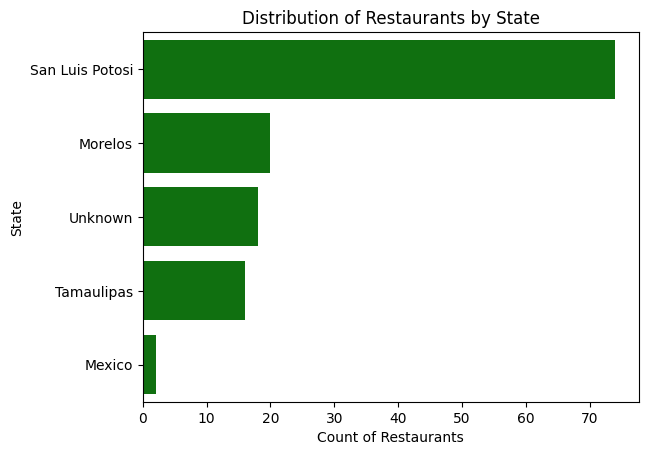

In [10]:
# Distribution of Restaurants by State
sns.countplot(y='state', data=restaurant_df, order = restaurant_df['state'].value_counts().index)
plt.title('Distribution of Restaurants by State')
plt.xlabel('Count of Restaurants')
plt.ylabel('State')
plt.show()

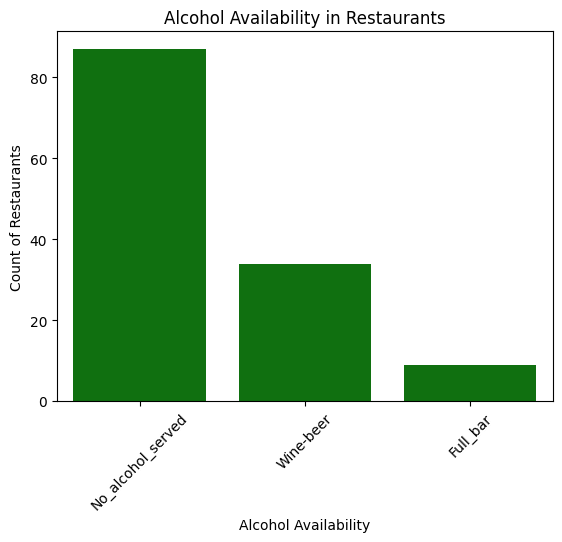

In [11]:
# Alcohol Availability
sns.countplot(x='alcohol', data=restaurant_df)
plt.title('Alcohol Availability in Restaurants')
plt.xlabel('Alcohol Availability')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45)
plt.show()

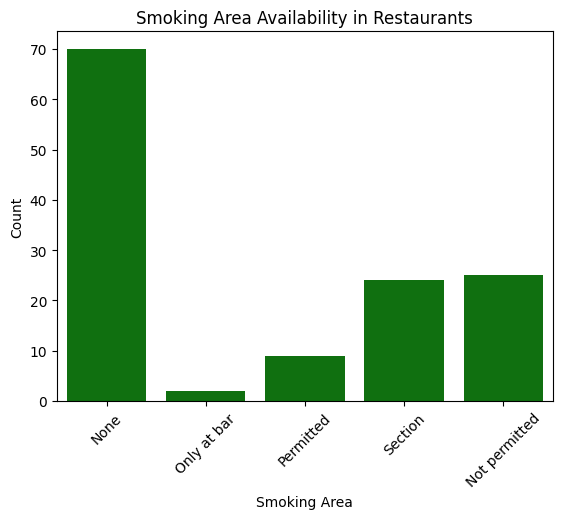

In [12]:
# Smoking Area Availability
sns.countplot(x='smoking_area', data=restaurant_df)
plt.title('Smoking Area Availability in Restaurants')
plt.xlabel('Smoking Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

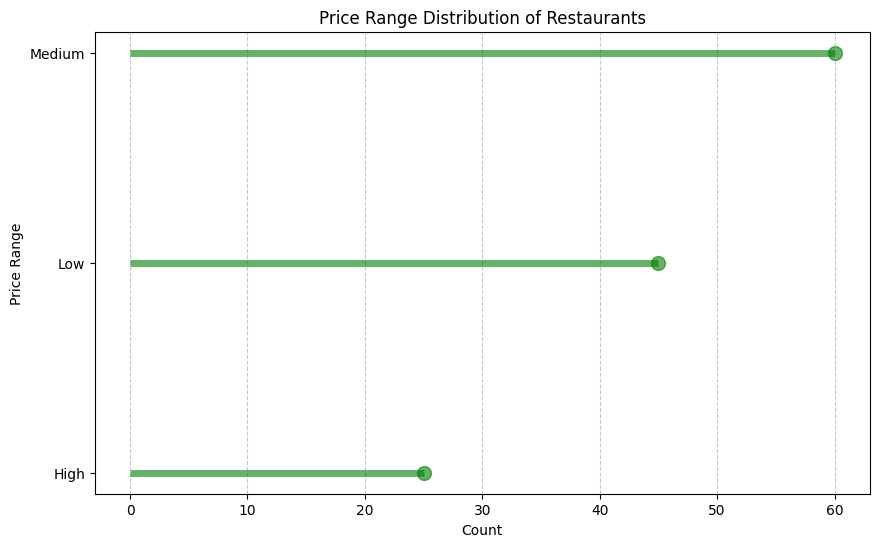

In [32]:
# Counts for each price range
price_counts = restaurant_df['price'].value_counts().reset_index()
price_counts.columns = ['price', 'count']
price_counts = price_counts.sort_values('price')  

# Now create the lollipop chart
plt.figure(figsize=(10, 6))
plt.hlines(y=price_counts['price'], xmin=0, xmax=price_counts['count'], color='green', alpha=0.6, linewidth=5)  # Horizontal lines
plt.scatter(price_counts['count'], price_counts['price'], color='green', s=100, alpha=0.6)  # Dots
plt.title('Price Range Distribution of Restaurants')
plt.xlabel('Count')
plt.ylabel('Price Range')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

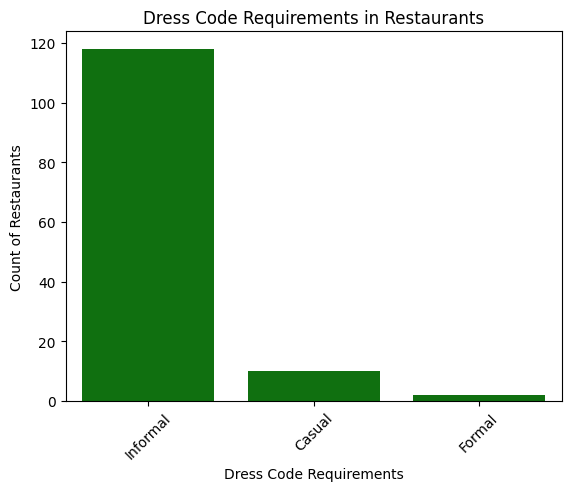

In [14]:
# Alcohol Availability
sns.countplot(x='dress_code', data=restaurant_df)
plt.title('Dress Code Requirements in Restaurants')
plt.xlabel('Dress Code Requirements')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45)
plt.show()

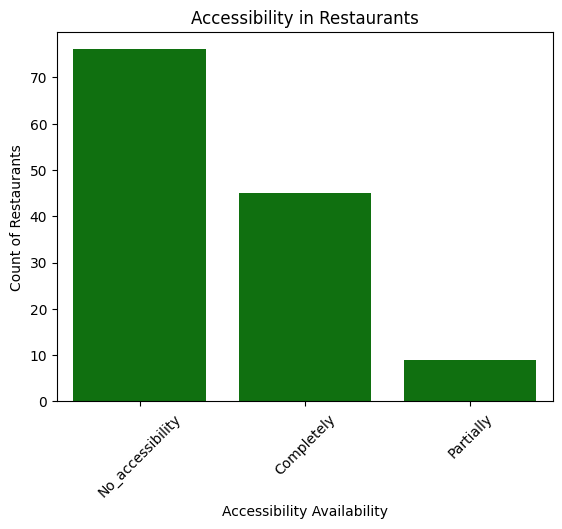

In [15]:
# Alcohol Availability
sns.countplot(x='accessibility', data=restaurant_df)
plt.title('Accessibility in Restaurants')
plt.xlabel('Accessibility Availability')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45)
plt.show()

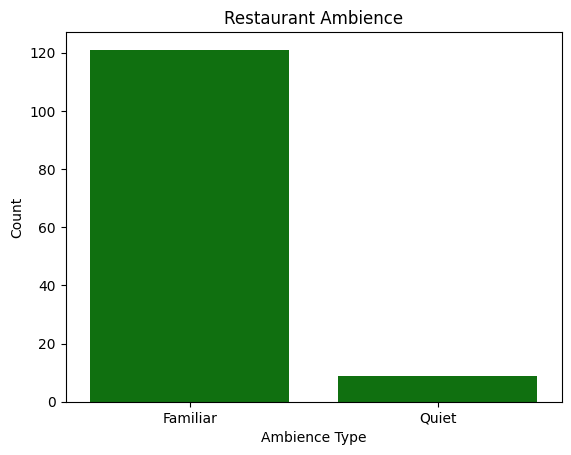

In [16]:
# Restaurant Ambience
sns.countplot(x='Rambience', data=restaurant_df)
plt.title('Restaurant Ambience')
plt.xlabel('Ambience Type')
plt.ylabel('Count')
plt.show()

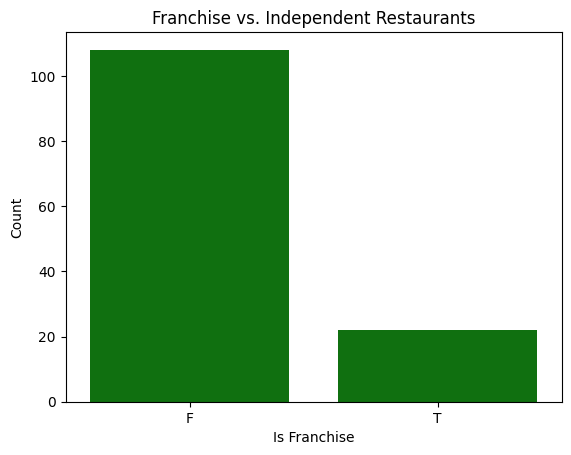

In [17]:
# Franchise vs. Independent
sns.countplot(x='franchise', data=restaurant_df)
plt.title('Franchise vs. Independent Restaurants')
plt.xlabel('Is Franchise')
plt.ylabel('Count')
plt.show()

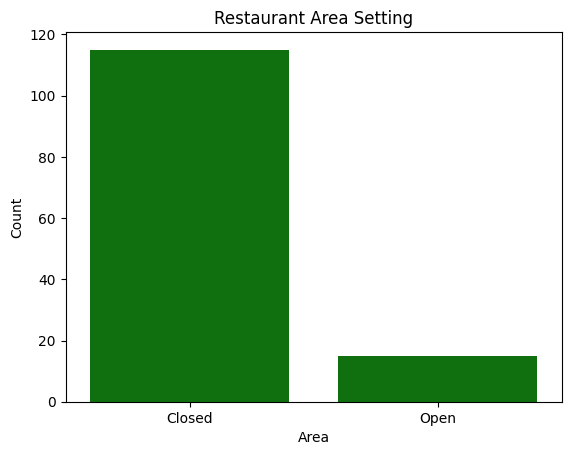

In [18]:
# Area (Open/Closed)
sns.countplot(x='area', data=restaurant_df)
plt.title('Restaurant Area Setting')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

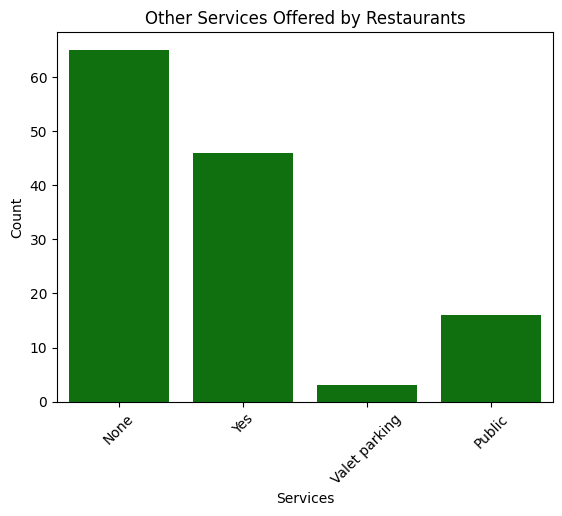

In [19]:
# Other Services Offered
sns.countplot(x='parking_lot_str', data=restaurant_df)
plt.title('Other Services Offered by Restaurants')
plt.xlabel('Services')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

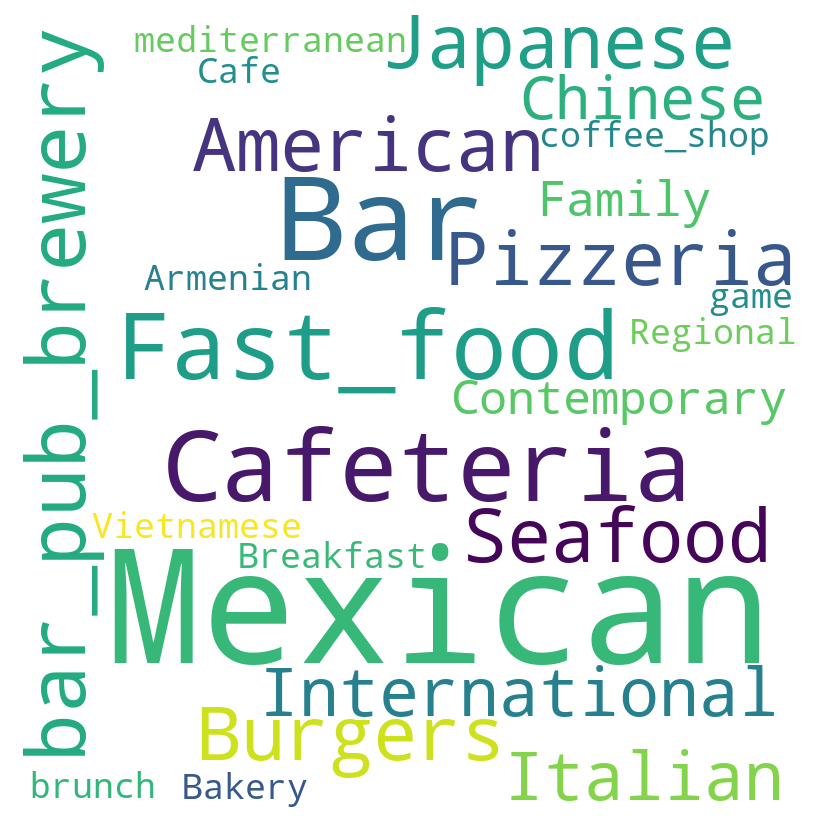

In [28]:
#Rcusine
all_cuisines = ' '.join(restaurant_df['Rcuisine_str'].fillna('')).replace('Unknown', '')

# Create and generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(all_cuisines)

# Display the generated image
plt.figure(figsize = (16,8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

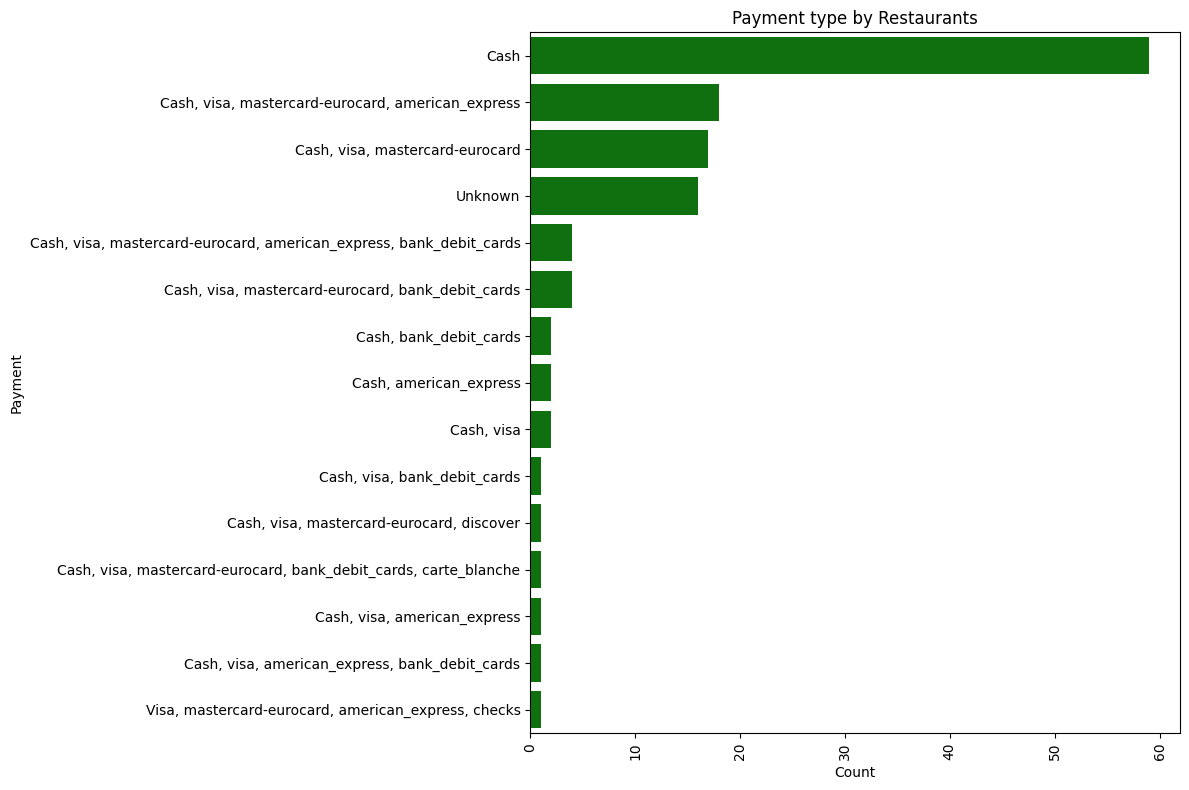

In [21]:
# Rcuisine
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
ax = sns.countplot(y='Rpayment_str', data=restaurant_df, order=restaurant_df['Rpayment_str'].value_counts().index)
ax.set_title('Payment type by Restaurants')
ax.set_xlabel('Count')
ax.set_ylabel('Payment')
plt.xticks(rotation=90)  # Rotate the labels to prevent overlap
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

In [33]:
# Combine User-related Data
# Aggregating 'Rcuisine' from usercuisine by userID
user_cuisine_agg = usercuisine.groupby('userID')['Rcuisine'].apply(list).reset_index()

# Aggregating 'Upayment' from userpayment by userID
user_payment_agg = userpayment.groupby('userID')['Upayment'].apply(list).reset_index()

# Merge these aggregated datasets with userprofile on 'userID'
user_df = userprofile.merge(user_cuisine_agg, on='userID', how='left')\
                     .merge(user_payment_agg, on='userID', how='left')

# Display the first few rows of the combined user-related DataFrame
user_df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,none,student,black,69,medium,1.77,[American],[cash]
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,[Mexican],[cash]
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,none,hard-worker,Catholic,student,blue,60,low,1.69,[Mexican],[cash]
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,none,professional,green,44,medium,1.53,"[Bakery, Breakfast-Brunch, Japanese, Contempor...","[cash, bank_debit_cards]"
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,...,none,thrifty-protector,Catholic,student,black,65,medium,1.69,[American],[cash]


In [34]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

In [35]:
user_df.describe()

,latitude,longitude,birth_year,weight,height
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,21.810389,-100.291857,1984.702899,64.869565,1.667536
std,1.552529,0.869916,14.655364,17.214332,0.130473
min,18.813348,-101.054680,1930.000000,40.000000,1.200000
25%,22.126030,-100.983000,1987.000000,53.000000,1.600000
50%,22.150497,-100.937788,1989.000000,65.000000,1.690000
75%,22.186642,-99.183251,1991.000000,74.750000,1.750000
max,23.771030,-99.067106,1994.000000,120.000000,2.000000


In [36]:
# Get Count of Missing Values
question_mark_count = user_df.apply(lambda col: col.astype(str).str.contains('\?').sum())
question_mark_count

userID               0
latitude             0
longitude            0
smoker               3
drink_level          0
dress_preference     5
ambience             6
transport            7
marital_status       4
hijos               11
birth_year           0
interest             0
personality          0
religion             0
activity             7
color                0
weight               0
budget               7
height               0
Rcuisine             0
Upayment             0
dtype: int64

In [37]:
# Capitalize the first letter of selected columns
columns_to_capitalize = ['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
                         'interest', 'personality', 'religion', 'activity', 'color', 'budget']

for col in columns_to_capitalize:
    user_df[col] = user_df[col].str.capitalize()

# For columns with list values, apply capitalization to each element in the list
list_columns = ['Upayment', 'Rcuisine']

for col in list_columns:
    user_df[col] = user_df[col].apply(lambda x: [i.capitalize() for i in x] if isinstance(x, list) else x)
    

# Replace '?' with Unknown for clarity
columns = ['smoker', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'activity', 'budget']

for col in columns:
    user_df[col] = user_df[col].replace('?', 'Unknown')
    
    
# Covert list to string
# Define the columns to convert from lists to comma-separated strings
columns_to_convert = ['Rcuisine', 'Upayment']

# Loop through each specified column and apply the transformation
for column in columns_to_convert:
    new_col_name = f"{column}_str"  # Create a new column name
    user_df[new_col_name] = user_df[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Drop duplicate columns
user_df = user_df.drop(['Rcuisine', 'Upayment'], axis = 1)

user_df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine_str,Upayment_str
0,U1001,22.139997,-100.978803,False,Abstemious,Informal,Family,On foot,Single,Independent,...,Variety,Thrifty-protector,None,Student,Black,69,Medium,1.77,American,Cash
1,U1002,22.150087,-100.983325,False,Abstemious,Informal,Family,Public,Single,Independent,...,Technology,Hunter-ostentatious,Catholic,Student,Red,40,Low,1.87,Mexican,Cash
2,U1003,22.119847,-100.946527,False,Social drinker,Formal,Family,Public,Single,Independent,...,None,Hard-worker,Catholic,Student,Blue,60,Low,1.69,Mexican,Cash
3,U1004,18.867000,-99.183000,False,Abstemious,Informal,Family,Public,Single,Independent,...,Variety,Hard-worker,None,Professional,Green,44,Medium,1.53,"Bakery, Breakfast-brunch, Japanese, Contempora...","Cash, Bank_debit_cards"
4,U1005,22.183477,-100.959891,False,Abstemious,No preference,Family,Public,Single,Independent,...,None,Thrifty-protector,Catholic,Student,Black,65,Medium,1.69,American,Cash


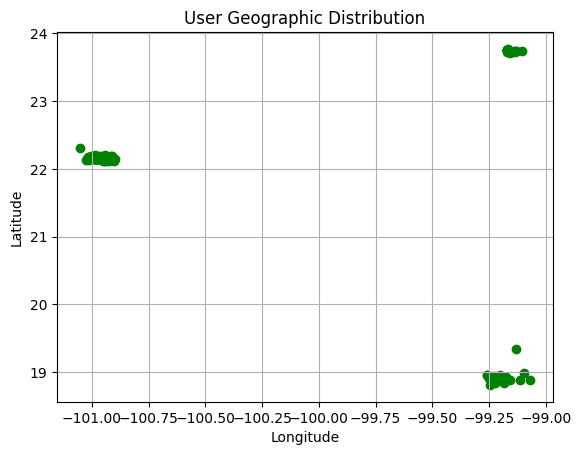

In [38]:
# User Geographic Distribution
plt.scatter(user_df['longitude'], user_df['latitude'],color = 'green')
plt.title('User Geographic Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

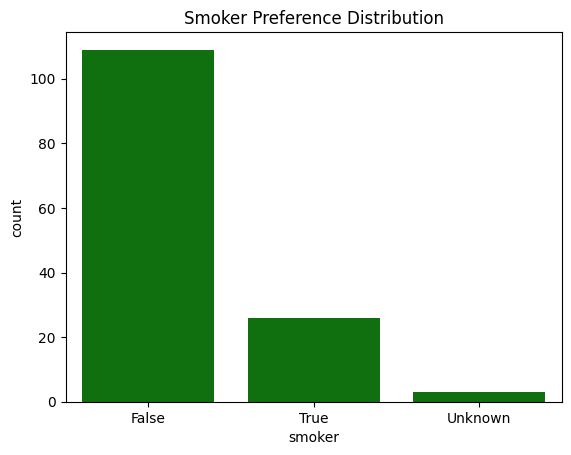

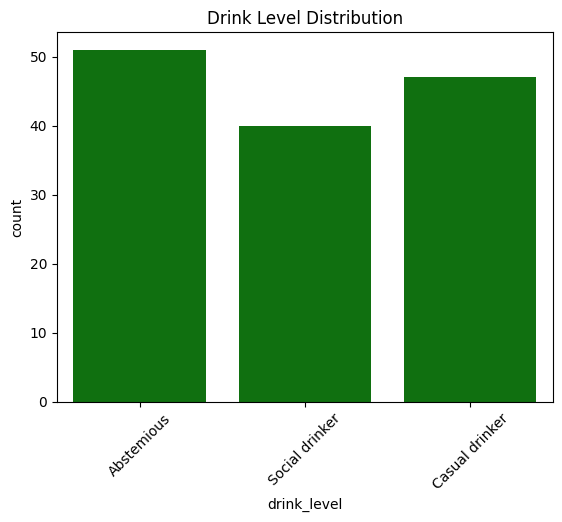

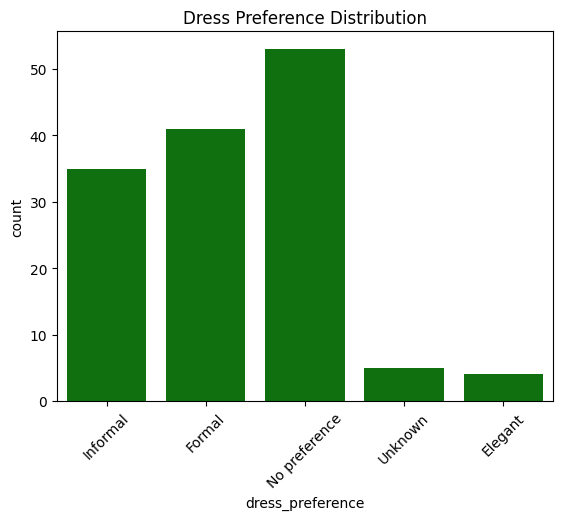

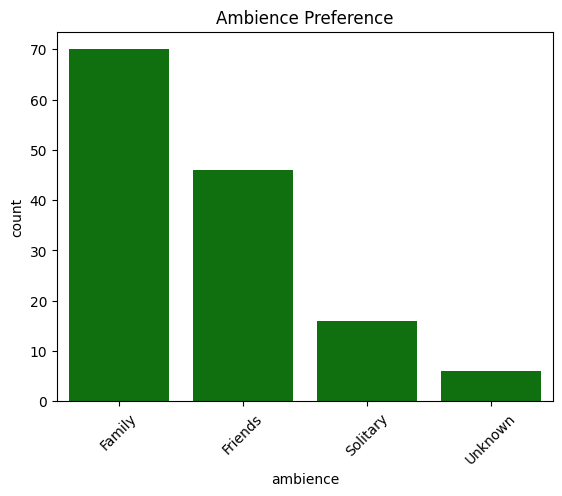

In [40]:
# Preferences and Behaviors
# Smoker preference distribution
sns.countplot(data=user_df, x='smoker')
plt.title('Smoker Preference Distribution')
plt.show()

# Drink level distribution
sns.countplot(data=user_df, x='drink_level')
plt.title('Drink Level Distribution')
plt.xticks(rotation=45)
plt.show()

# Dress preference distribution
sns.countplot(data=user_df, x='dress_preference')
plt.title('Dress Preference Distribution')
plt.xticks(rotation=45)
plt.show()

# Ambience preference
sns.countplot(data=user_df, x='ambience')
plt.title('Ambience Preference')
plt.xticks(rotation=45)
plt.show()


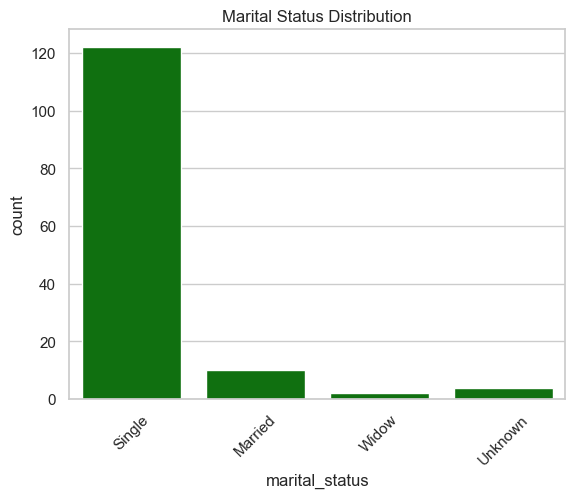

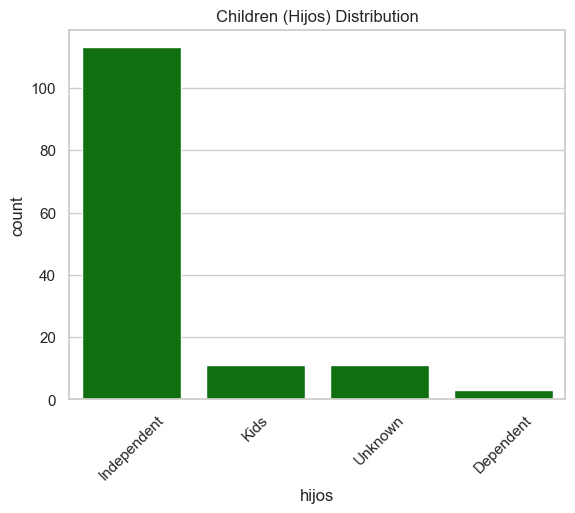

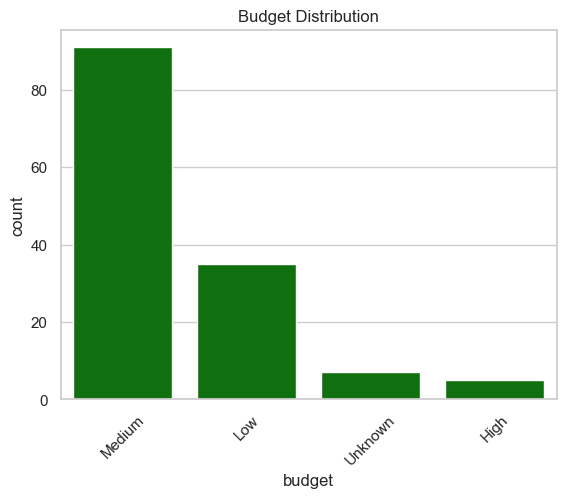

In [55]:
# Demographics
# Marital status distribution
sns.countplot(data=user_df, x='marital_status')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Children (hijos) distribution
sns.countplot(data=user_df, x='hijos')
plt.title('Children (Hijos) Distribution')
plt.xticks(rotation=45)
plt.show()

# Budget distribution
sns.countplot(data=user_df, x='budget')
plt.title('Budget Distribution')
plt.xticks(rotation=45)
plt.show()

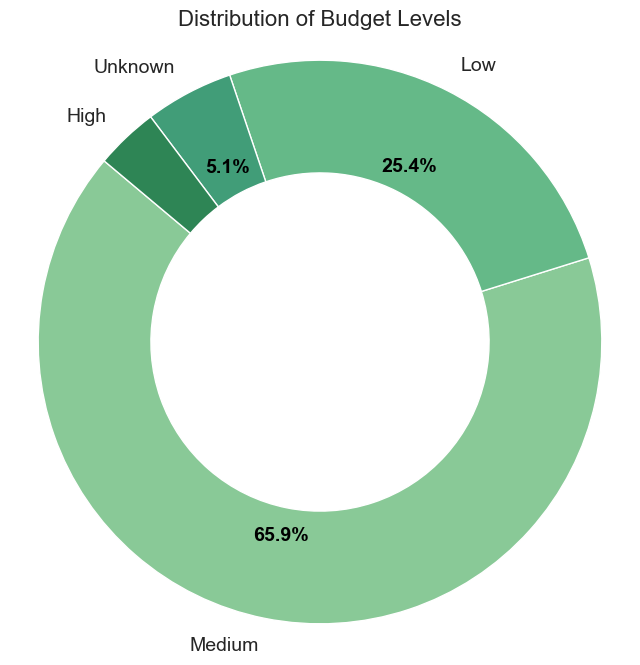

In [62]:
# Budget distribution

budget_counts = user_df['budget'].value_counts()

# Create a donut chart
colors = ['#89C997', '#65B988', '#419D78', '#2E8555']

# Function to calculate the label position
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('{:.1f}%'.format(pct)) if pct > limit else ''
    return inner_autopct

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(budget_counts, labels=budget_counts.index, autopct=autopct_generator(limit=5),
                                  startangle=140, colors=colors, wedgeprops=dict(width=0.4))

# Increase the size of the labels and percentage texts and align to center
plt.setp(texts, size=14)  
for autotext in autotexts:
    autotext.set_color('black') 
    autotext.set_size(14)       
    autotext.set_weight('bold')

# Adjust the position of the percentage labels to be more centered
for i, autotext in enumerate(autotexts):
    # Get the angle and set the position
    angle_rad = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    angle_deg = np.deg2rad(angle_rad)  
    x = np.cos(angle_deg) * 0.7       
    y = np.sin(angle_deg) * 0.7       
    autotext.set_position((x, y))

plt.title('Distribution of Budget Levels', fontsize=16)
plt.axis('equal')  # Ensure it is a circle
plt.show()

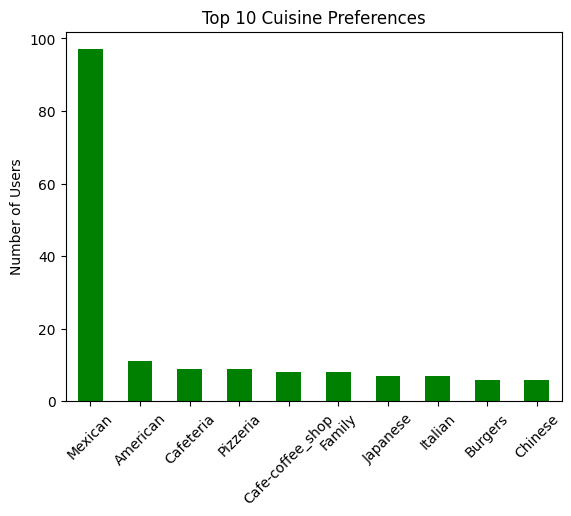

In [42]:
# Cuisine Preferences
cuisines = user_df['Rcuisine_str'].str.split(', ', expand=True).stack().value_counts()

# Top 10 cuisines
top_cuisines = cuisines.head(10)
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisine Preferences')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

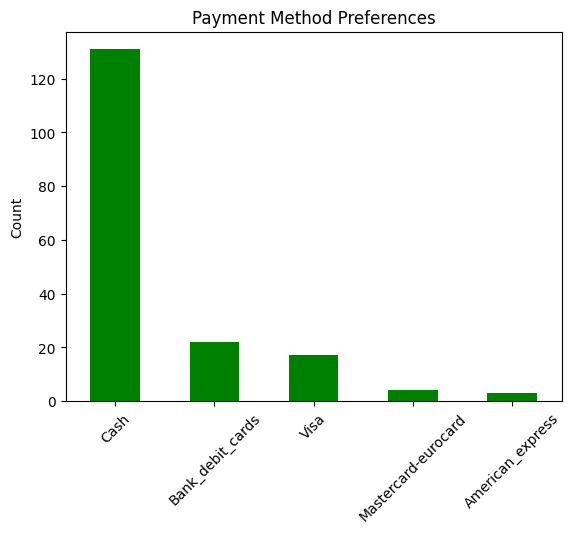

In [43]:
# Payment Methods
payments = user_df['Upayment_str'].str.split(', ', expand=True).stack().value_counts()

payments.plot(kind='bar')
plt.title('Payment Method Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [44]:
rating_final.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_11832/2210665261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rating_final, x='rating', palette=green_palette)


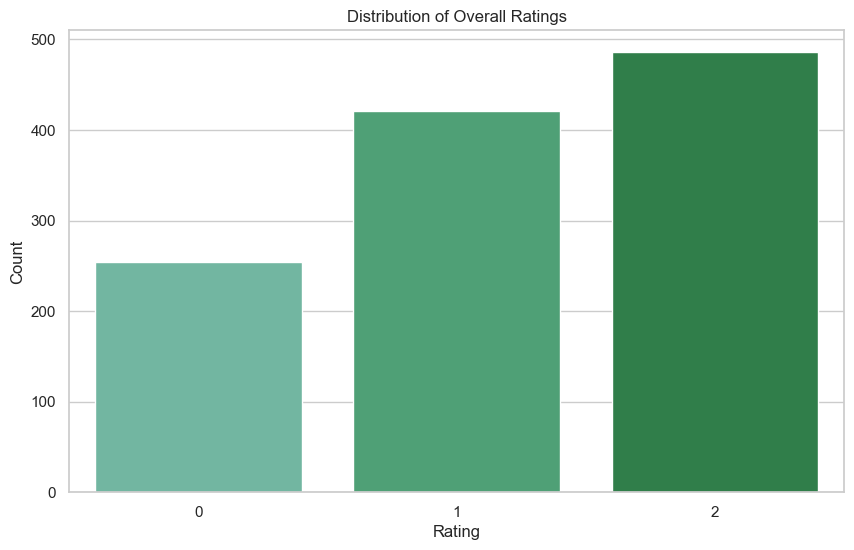

/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_11832/2210665261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rating_final, x='food_rating', palette=green_palette)


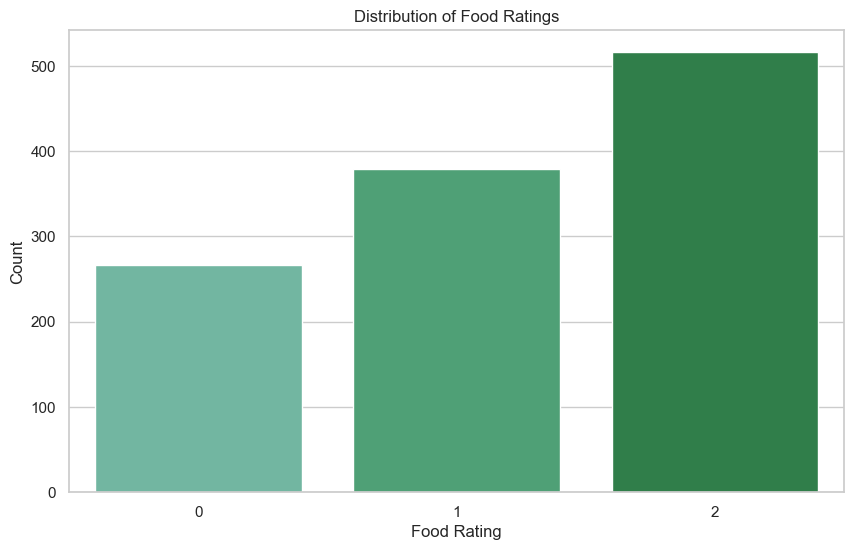

/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_11832/2210665261.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rating_final, x='service_rating', palette=green_palette)


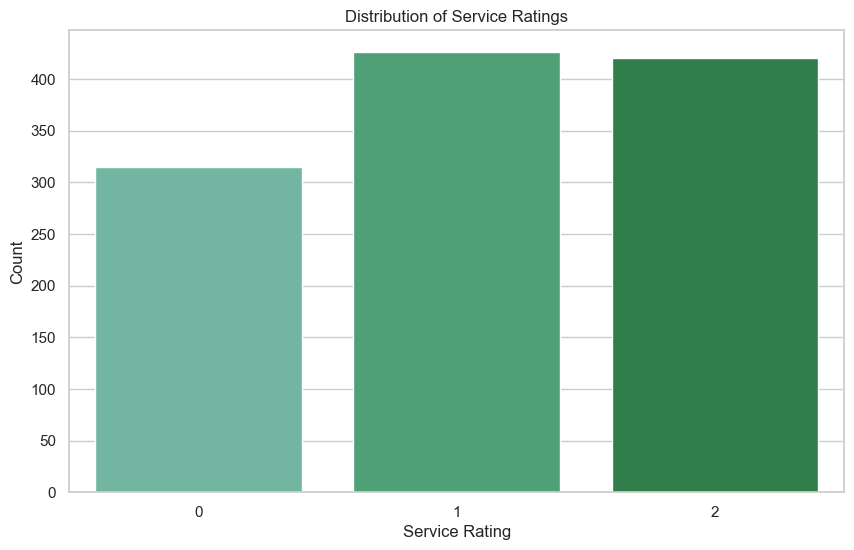

In [45]:
# Setting Seaborn style
sns.set(style="whitegrid")

# Define a palette with three shades of green
green_palette = ["#66c2a5", "#41ae76", "#238b45"]  # Light to dark shades of green

# Distribution of overall ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=rating_final, x='rating', palette=green_palette)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of food ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=rating_final, x='food_rating', palette=green_palette)
plt.title('Distribution of Food Ratings')
plt.xlabel('Food Rating')
plt.ylabel('Count')
plt.show()

# Distribution of service ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=rating_final, x='service_rating', palette=green_palette)
plt.title('Distribution of Service Ratings')
plt.xlabel('Service Rating')
plt.ylabel('Count')
plt.show()


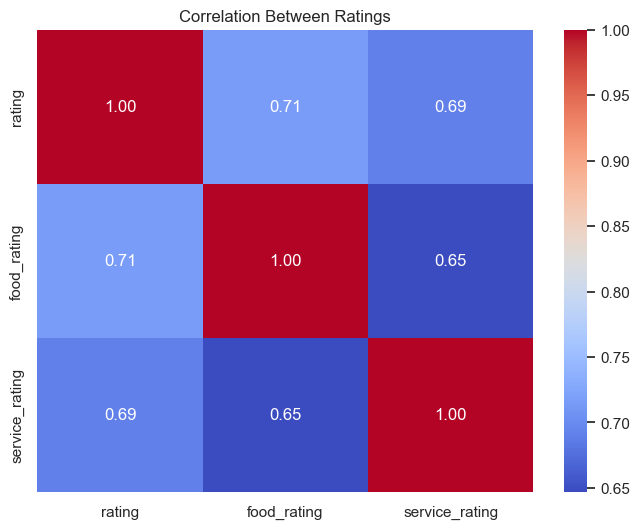

In [46]:
# Calculating the correlation matrix
correlation_matrix = rating_final[['rating', 'food_rating', 'service_rating']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Ratings')
plt.show()

In [47]:
# Merge rating_final with restaurant_df on 'placeID'
ratings_restaurants_df = rating_final.merge(restaurant_df, on='placeID', how='left')

# Merge the resulting DataFrame with user_df on 'userID'
final_combined_df = ratings_restaurants_df.merge(user_df, on='userID', how='left')

# Display the first few rows of the final combined DataFrame
final_combined_df.head()

,userID,placeID,rating,food_rating,service_rating,latitude_x,longitude_x,name,state,alcohol,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine_str_y,Upayment_str
0,U1077,135085,2,2,2,22.150802,-100.982680,Tortas Locas Hipocampo,San Luis Potosi,No_alcohol_served,...,Technology,Thrifty-protector,Catholic,Student,Blue,65,Medium,1.71,Mexican,"Visa, Cash, Bank_debit_cards"
1,U1077,135038,2,2,1,22.155651,-100.977767,Restaurant la Chalita,San Luis Potosi,No_alcohol_served,...,Technology,Thrifty-protector,Catholic,Student,Blue,65,Medium,1.71,Mexican,"Visa, Cash, Bank_debit_cards"
2,U1077,132825,2,2,2,22.147392,-100.983092,puesto de tacos,San Luis Potosi,No_alcohol_served,...,Technology,Thrifty-protector,Catholic,Student,Blue,65,Medium,1.71,Mexican,"Visa, Cash, Bank_debit_cards"
3,U1077,135060,1,2,2,22.156883,-100.978485,Restaurante Marisco Sam,San Luis Potosi,No_alcohol_served,...,Technology,Thrifty-protector,Catholic,Student,Blue,65,Medium,1.71,Mexican,"Visa, Cash, Bank_debit_cards"
4,U1068,135104,1,1,2,23.752982,-99.168434,vips,Unknown,Full_bar,...,Technology,Thrifty-protector,Catholic,Student,Blue,72,Low,1.57,Mexican,Cash


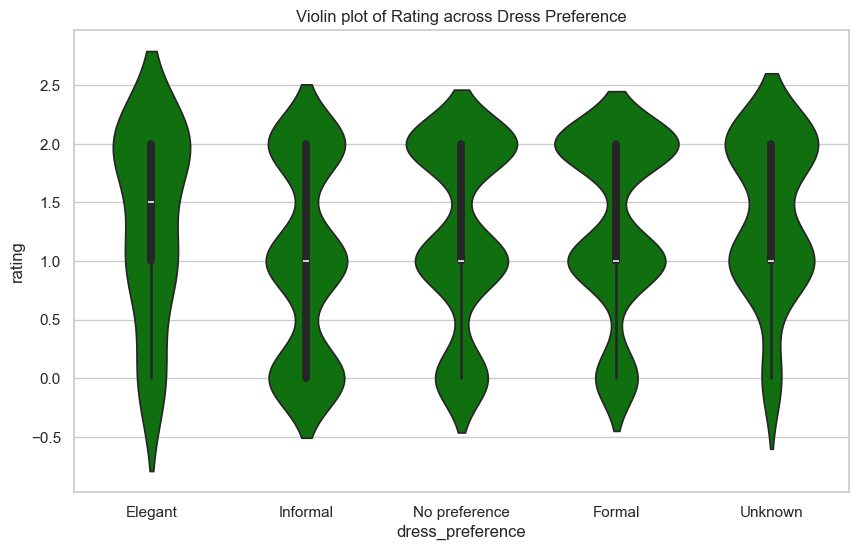

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='dress_preference', y='rating', data=final_combined_df, color = 'green')
plt.title('Violin plot of Rating across Dress Preference')
plt.show()

#### Inspecting the final "clean" data frames

In [ ]:
restaurant_df

In [ ]:
user_df

In [ ]:
rating_final

#### Save the files back  

In [ ]:
restaurant_df.to_csv("../data/clean/restaraunts.csv")
user_df.to_csv("../data/clean/users.csv")
rating_final.to_csv("../data/clean/ratings.csv")